In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df =pd.read_csv("/kaggle/input/alzheimers-disease-dataset-csv/alzheimers_disease_data.csv")
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,DietQuality,SleepQuality,FamilyHistoryAlzheimers,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0.0,2,22.927749,0.0,13.297218,1.347214,9.025679,0.0,...,6.518877,0.0,0.0,1.725883,0.0,0,0.0,1.0,0,0
1,89,0,0.0,0,26.827681,0.0,4.542524,0.518767,7.151293,0.0,...,7.118696,0.0,0.0,2.592424,0.0,0,0.0,0.0,1,0
2,73,0,3.0,1,17.795882,0.0,19.555085,1.826335,9.673574,1.0,...,5.895077,0.0,0.0,7.119548,0.0,1,0.0,1.0,0,0
3,74,1,0.0,1,33.800817,1.0,12.209266,7.435604,8.392554,0.0,...,8.965106,0.0,1.0,6.481226,0.0,0,0.0,0.0,0,0
4,89,0,0.0,0,20.716974,NaN,18.454356,0.795498,5.597238,0.0,...,6.045039,0.0,0.0,0.014691,0.0,0,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0.0,1,39.121757,0.0,NaN,6.555306,7.535540,0.0,...,0.238667,0.0,0.0,4.492838,1.0,0,0.0,0.0,0,1
2145,75,0,0.0,2,17.857903,0.0,18.767261,2.904662,8.555256,0.0,...,8.687480,0.0,1.0,9.204952,0.0,0,0.0,0.0,0,1
2146,77,0,0.0,1,15.476479,0.0,4.594670,8.120025,5.769464,0.0,...,NaN,0.0,0.0,5.036334,0.0,0,0.0,0.0,0,1
2147,78,1,3.0,1,15.299911,0.0,8.674505,1.263427,8.322874,0.0,...,5.173891,0.0,0.0,3.785399,0.0,0,0.0,0.0,1,1


In [3]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,DietQuality,SleepQuality,FamilyHistoryAlzheimers,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0.0,2,22.927749,0.0,13.297218,1.347214,9.025679,0.0,...,6.518877,0.0,0.0,1.725883,0.0,0,0.0,1.0,0,0
1,89,0,0.0,0,26.827681,0.0,4.542524,0.518767,7.151293,0.0,...,7.118696,0.0,0.0,2.592424,0.0,0,0.0,0.0,1,0
2,73,0,3.0,1,17.795882,0.0,19.555085,1.826335,9.673574,1.0,...,5.895077,0.0,0.0,7.119548,0.0,1,0.0,1.0,0,0
3,74,1,0.0,1,33.800817,1.0,12.209266,7.435604,8.392554,0.0,...,8.965106,0.0,1.0,6.481226,0.0,0,0.0,0.0,0,0
4,89,0,0.0,0,20.716974,NaN,18.454356,0.795498,5.597238,0.0,...,6.045039,0.0,0.0,0.014691,0.0,0,1.0,1.0,0,0


In [4]:
print(df.shape)

(2149, 28)


In [5]:
print(df.columns)

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'FunctionalAssessment', 'MemoryComplaints',
       'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation',
       'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness',
       'Diagnosis'],
      dtype='object')


In [6]:
df.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,DietQuality,SleepQuality,FamilyHistoryAlzheimers,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2146.000000,2149.000000,2135.000000,2147.000000,2136.000000,2141.000000,2132.000000,2147.000000,...,2126.000000,2147.000000,2148.000000,2139.000000,2148.000000,2149.000000,2146.000000,2147.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.698043,1.286645,27.648121,0.288775,10.043365,4.997153,7.047041,0.251980,...,5.074657,0.208197,0.156890,4.984915,0.205307,0.158213,0.150513,0.158826,0.301536,0.353653
std,8.990221,0.500077,0.996575,0.904527,7.227743,0.453299,5.756650,2.909758,1.763793,0.434251,...,2.895010,0.406113,0.363782,2.947625,0.404020,0.365026,0.357656,0.365599,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.009385,4.002629,0.000000,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.600019,0.000000,5.151910,2.451237,5.479246,0.000000,...,2.562082,0.000000,0.000000,2.346755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.804175,0.000000,9.924320,5.096252,7.109891,0.000000,...,5.083273,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.873210,1.000000,15.170618,7.560935,8.559487,1.000000,...,7.546579,0.000000,0.000000,7.581343,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.998346,9.999840,1.000000,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2146 non-null   float64
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2135 non-null   float64
 5   Smoking                    2147 non-null   float64
 6   AlcoholConsumption         2136 non-null   float64
 7   DietQuality                2141 non-null   float64
 8   SleepQuality               2132 non-null   float64
 9   FamilyHistoryAlzheimers    2147 non-null   float64
 10  CardiovascularDisease      2143 non-null   float64
 11  Diabetes                   2147 non-null   float64
 12  Depression                 2145 non-null   float64
 13  HeadInjury                 2145 non-null   float

In [8]:
print(df.nunique())

Age                            31
Gender                          2
Ethnicity                       4
EducationLevel                  4
BMI                          2135
Smoking                         2
AlcoholConsumption           2136
DietQuality                  2141
SleepQuality                 2132
FamilyHistoryAlzheimers         2
CardiovascularDisease           2
Diabetes                        2
Depression                      2
HeadInjury                      2
Hypertension                    2
SystolicBP                     90
DiastolicBP                    60
CholesterolTotal             2135
FunctionalAssessment         2126
MemoryComplaints                2
BehavioralProblems              2
ADL                          2139
Confusion                       2
Disorientation                  2
PersonalityChanges              2
DifficultyCompletingTasks       2
Forgetfulness                   2
Diagnosis                       2
dtype: int64


In [9]:
print(df.isnull().sum())

Age                           0
Gender                        0
Ethnicity                     3
EducationLevel                0
BMI                          14
Smoking                       2
AlcoholConsumption           13
DietQuality                   8
SleepQuality                 17
FamilyHistoryAlzheimers       2
CardiovascularDisease         6
Diabetes                      2
Depression                    4
HeadInjury                    4
Hypertension                  4
SystolicBP                    3
DiastolicBP                   8
CholesterolTotal             14
FunctionalAssessment         23
MemoryComplaints              2
BehavioralProblems            1
ADL                          10
Confusion                     1
Disorientation                0
PersonalityChanges            3
DifficultyCompletingTasks     2
Forgetfulness                 0
Diagnosis                     0
dtype: int64


In [10]:
df.dtypes

Age                            int64
Gender                         int64
Ethnicity                    float64
EducationLevel                 int64
BMI                          float64
Smoking                      float64
AlcoholConsumption           float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers      float64
CardiovascularDisease        float64
Diabetes                     float64
Depression                   float64
HeadInjury                   float64
Hypertension                 float64
SystolicBP                   float64
DiastolicBP                  float64
CholesterolTotal             float64
FunctionalAssessment         float64
MemoryComplaints             float64
BehavioralProblems           float64
ADL                          float64
Confusion                    float64
Disorientation                 int64
PersonalityChanges           float64
DifficultyCompletingTasks    float64
Forgetfulness                  int64
D

<Axes: >

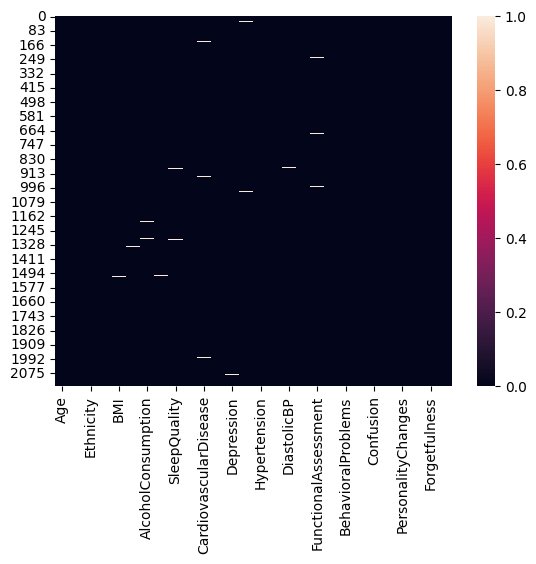

In [11]:
sns.heatmap(df.isnull())

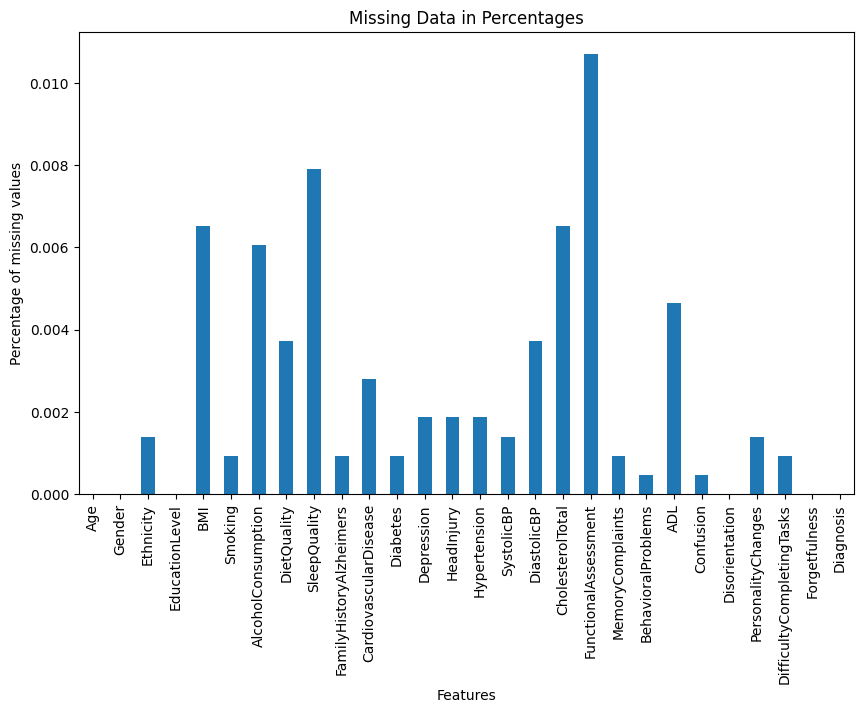

In [12]:
df.isnull().mean().plot.bar(figsize=(10,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Features')
plt.title('Missing Data in Percentages');

In [13]:
df= df.fillna(df.mean())
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,DietQuality,SleepQuality,FamilyHistoryAlzheimers,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0.0,2,22.927749,0.000000,13.297218,1.347214,9.025679,0.0,...,6.518877,0.0,0.0,1.725883,0.0,0,0.0,1.0,0,0
1,89,0,0.0,0,26.827681,0.000000,4.542524,0.518767,7.151293,0.0,...,7.118696,0.0,0.0,2.592424,0.0,0,0.0,0.0,1,0
2,73,0,3.0,1,17.795882,0.000000,19.555085,1.826335,9.673574,1.0,...,5.895077,0.0,0.0,7.119548,0.0,1,0.0,1.0,0,0
3,74,1,0.0,1,33.800817,1.000000,12.209266,7.435604,8.392554,0.0,...,8.965106,0.0,1.0,6.481226,0.0,0,0.0,0.0,0,0
4,89,0,0.0,0,20.716974,0.288775,18.454356,0.795498,5.597238,0.0,...,6.045039,0.0,0.0,0.014691,0.0,0,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0.0,1,39.121757,0.000000,10.043365,6.555306,7.535540,0.0,...,0.238667,0.0,0.0,4.492838,1.0,0,0.0,0.0,0,1
2145,75,0,0.0,2,17.857903,0.000000,18.767261,2.904662,8.555256,0.0,...,8.687480,0.0,1.0,9.204952,0.0,0,0.0,0.0,0,1
2146,77,0,0.0,1,15.476479,0.000000,4.594670,8.120025,5.769464,0.0,...,5.074657,0.0,0.0,5.036334,0.0,0,0.0,0.0,0,1
2147,78,1,3.0,1,15.299911,0.000000,8.674505,1.263427,8.322874,0.0,...,5.173891,0.0,0.0,3.785399,0.0,0,0.0,0.0,1,1


In [14]:
df.isnull().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosis                    0
dtype: int64

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
X

array([[-0.21236841, -1.01264391, -0.70109469, ...,  2.30241639,
        -0.65704809, -0.73970009],
       [ 1.56775727, -1.01264391, -0.70109469, ..., -0.43473089,
         1.52195861, -0.73970009],
       [-0.21236841, -1.01264391,  2.31202122, ...,  2.30241639,
        -0.65704809, -0.73970009],
       ...,
       [ 0.23266301, -1.01264391, -0.70109469, ..., -0.43473089,
        -0.65704809,  1.35189925],
       [ 0.34392086,  0.98751396,  2.31202122, ..., -0.43473089,
         1.52195861,  1.35189925],
       [-0.32362627, -1.01264391, -0.70109469, ..., -0.43473089,
         1.52195861, -0.73970009]])